### Active Region areas from SDO/HMI metadata for Feb 2018 and Sep 2017 series

This script will fetch the area of all the active regions detected by the HMI processing pipeline. These "AREA" that are "magnetically" active will contain sunspot but also regions where sunspot aren't visible, as a magnetically active region can be strong enough to trigger a detection but not strong enough to cause the appearance of a sunspot

In [1]:
import drms
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
%matplotlib notebook

In [2]:
def get_mharp_data(tstart, tend):
    c = drms.Client()
    # Convert time window of interest into a formatted string with optional extra time before and after
    # duration of the query time window in days 
    dt = (tend - tstart).days
    # Make the query
    df_mharp = c.query('hmi.Mharp_720s[][{:s}_TAI/{:d}d@24h]'.format(tstart.strftime("%Y.%m.%d"), dt), 
                       key='T_REC, HARPNUM, AREA')
    # Convert the time to a Pandas-compatible time
    #df_mharp['T_REC'] = df_mharp['T_REC'].apply(lambda x: parse_time(x))
    df_mharp['T_REC'] = df_mharp['T_REC'].apply(lambda x: pd.Timestamp(x.replace('_TAI', '').replace('_', ' ')))
    return df_mharp

### Feb 2018 series

In [3]:
tstart = datetime.date(2018, 2, 1)
tend = datetime.date(2018, 2, 28)
df_mharp = get_mharp_data(tstart, tend)
print(df_mharp)

        T_REC  HARPNUM         AREA
0  2018-02-01     7235   865.969910
1  2018-02-02     7235   812.163574
2  2018-02-03     7235   858.091675
3  2018-02-04     7235   790.545837
4  2018-02-05     7235   391.363525
5  2018-02-06     7235          NaN
6  2018-02-02     7236   419.379883
7  2018-02-03     7236          NaN
8  2018-02-04     7236          NaN
9  2018-02-05     7236   375.540253
10 2018-02-06     7236   375.210052
11 2018-02-07     7236   165.072052
12 2018-02-08     7236   206.725632
13 2018-02-09     7236          NaN
14 2018-02-10     7236          NaN
15 2018-02-04     7237          NaN
16 2018-02-05     7237  2782.025879
17 2018-02-06     7237  3283.389160
18 2018-02-07     7237  3416.515137
19 2018-02-08     7237  3575.060303
20 2018-02-09     7237  3720.981201
21 2018-02-10     7237  4042.016113
22 2018-02-11     7237  4282.413086
23 2018-02-12     7237  4354.744141
24 2018-02-13     7237  4767.751953
25 2018-02-14     7237  4547.770508
26 2018-02-15     7237  3974

#### On the results above, you can see "HARPNUM" that is a unique identifier to a magnetically active area. There can be many active area on the sun at the same time. For a given day, one has to make the sum of all the area to have the total area for that day. 
- For example item 1 and item 6 one has harpnum 7235 and 7236 at the same date. 
- Pandas can be used to group everything by day using the T_REC column, then "aggregate" the AREA by a sum operation
- It's best to alway reset the index after an aggregation to keep things in order.

In [4]:
df_total_area = df_mharp.groupby(['T_REC'])['AREA'].agg([('TOTAL AREA', 'sum')]).reset_index()
print(df_total_area)

        T_REC   TOTAL AREA
0  2018-02-01   865.969910
1  2018-02-02  1231.543457
2  2018-02-03   858.091675
3  2018-02-04   790.545837
4  2018-02-05  3548.929657
5  2018-02-06  3658.599212
6  2018-02-07  3581.587189
7  2018-02-08  3781.785935
8  2018-02-09  3720.981201
9  2018-02-10  4042.016113
10 2018-02-11  4282.413086
11 2018-02-12  4354.744141
12 2018-02-13  4767.751953
13 2018-02-14  4547.770508
14 2018-02-15  3974.111572
15 2018-02-16  3011.231934
16 2018-02-17  1430.899292
17 2018-02-18     0.000000
18 2018-02-26     0.000000
19 2018-02-27  1412.767456


Now that we have aggregated all the active regions by summing the total area for each day, we have unique series of T_REC than serve as an index. It's not mandatory but makes manipulating the dataframe more convenient.

In [5]:
df_total_area.set_index('T_REC', inplace=True)
print(df_total_area)

             TOTAL AREA
T_REC                  
2018-02-01   865.969910
2018-02-02  1231.543457
2018-02-03   858.091675
2018-02-04   790.545837
2018-02-05  3548.929657
2018-02-06  3658.599212
2018-02-07  3581.587189
2018-02-08  3781.785935
2018-02-09  3720.981201
2018-02-10  4042.016113
2018-02-11  4282.413086
2018-02-12  4354.744141
2018-02-13  4767.751953
2018-02-14  4547.770508
2018-02-15  3974.111572
2018-02-16  3011.231934
2018-02-17  1430.899292
2018-02-18     0.000000
2018-02-26     0.000000
2018-02-27  1412.767456


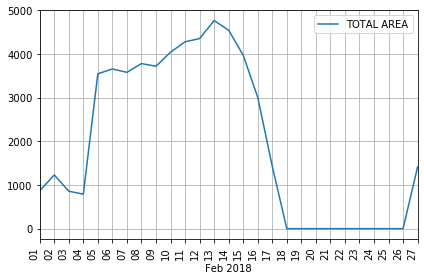

In [6]:
# Plot the above result
ax = df_total_area.plot(y=['TOTAL AREA'],style='-', grid=True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# Only display day of the month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
# # set font and rotation for date tick labels
plt.xticks(rotation=90)
plt.xlabel('Feb 2018')
plt.grid(True)
plt.tight_layout()

### Sep 2017

In [7]:
tstart = datetime.date(2017, 8, 25)
tend = datetime.date(2017, 9, 26)
df_mharp = get_mharp_data(tstart, tend)
df_total_area = df_mharp.groupby(['T_REC'])['AREA'].agg([('TOTAL AREA', 'sum')]).reset_index()
df_total_area.set_index('T_REC', inplace=True)

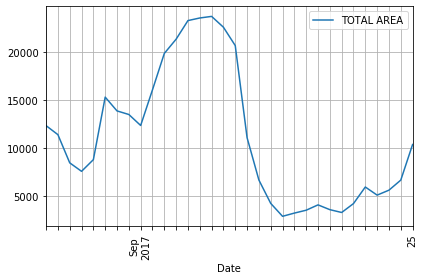

In [8]:
# Plot the above result
ax = df_total_area.plot(y=['TOTAL AREA'], style='-', grid=True)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# # set formatter
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
# # set font and rotation for date tick labels
ax.set_xticks(df_total_area.index)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()

### Now that we know how to get a total area for a given time window. The next step would be to use the other method to get the mean intensity for the same time window, and see if there's a time lag between the maxima of the total area, and the minima of the mean intensity. 